## (e) Model Trees

In [34]:
# call Weka
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/shengjiawu/anaconda3/lib/python3.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/shengjiawu/anaconda3/lib/python3.7/site-packages/javabridge/jars/runnablequeue.jar', '/Users/shengjiawu/anaconda3/lib/python3.7/site-packages/javabridge/jars/cpython.jar', '/Users/shengjiawu/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/shengjiawu/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/shengjiawu/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/shengjiawu/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [35]:
# print result

import weka.plot.classifiers as plcls  # NB: matplotlib is required

def print_result(evaluation):
    print('\nThe error rate is\n', 1 - evaluation.percent_correct/100)
    print('\nThe Confusion Matrix is\n', evaluation.confusion_matrix)
    print('\nThe ROC is\n')
    plcls.plot_roc(evaluation, class_index=[0, 1], wait=True)
    print('\nThe AUC is\n', evaluation.area_under_roc(0), evaluation.area_under_roc(1))


In [36]:
# import data using weka
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.CSVLoader")
failure_train_weka = loader.load_file('./2Tree-Based Methods/aps_failure_train_weka.csv') # == failure_train
failure_test_weka = loader.load_file('./2Tree-Based Methods/aps_failure_test_weka.csv') # == failure_test
failure_train_weka.class_is_last()
failure_test_weka.class_is_last()


In [37]:
# create an untrained model
from weka.classifiers import Classifier
cls_ucps = Classifier(classname = "weka.classifiers.trees.LMT")


In [38]:
# cross-validation on 5-fold
from weka.classifiers import Evaluation
from weka.core.classes import Random
evl_train_ucps = Evaluation(failure_train_weka)
evl_train_ucps.crossvalidate_model(cls_ucps, failure_train_weka, 5, Random(1))


For training set,

The error rate is
 0.008433333333333293

The Confusion Matrix is
 [[58842.   158.]
 [  348.   652.]]

The ROC is



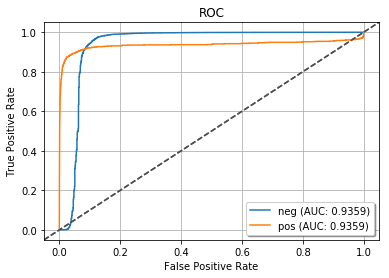


The AUC is
 0.9359433389830508 0.9359388728813559


In [39]:
print('For training set,')
print_result(evl_train_ucps)

In [7]:
# train Logistic Model Trees for the APS data set without compensation for class imbalance
cls_ucps.build_classifier(failure_train_weka)


For test set,

The error rate is
 0.009341269841269928

The Confusion Matrix is
 [[245814.    686.]
 [  1668.   3832.]]

The ROC is



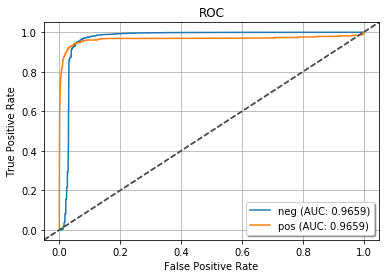


The AUC is
 0.9658894346302784 0.9658913335791997


In [26]:
# error on test set
print('For test set,')
evl_test_ucps = Evaluation(failure_train_weka)
evl_test_ucps.test_model(cls_ucps, failure_test_weka)
print_result(evl_test_ucps)


## (f) SMOTE

In [27]:
# import data using weka
#from weka.core.converters import Loader
#loader = Loader(classname="weka.core.converters.CSVLoader")
failure_train_cps_weka = loader.load_file('./2Tree-Based Methods/aps_failure_train_cps_weka.csv') # == failure_train
#failure_test_weka = loader.load_file('./2Tree-Based Methods/aps_failure_test_weka.csv') # == failure_test
failure_train_cps_weka.class_is_last()
#failure_test_weka.class_is_last()


In [28]:
# create an untrained model
#from weka.classifiers import Classifier
cls_cps = Classifier(classname = "weka.classifiers.trees.LMT")


In [29]:
# cross-validation on 5-fold
#from weka.classifiers import Evaluation
#from weka.core.classes import Random
evl_cps_train = Evaluation(failure_train_cps_weka)
evl_cps_train.crossvalidate_model(cls_cps, failure_train_cps_weka, 5, Random(1))


For training set,

The error rate is
 0.013423728813559244

The Confusion Matrix is
 [[58101.   899.]
 [  685. 58315.]]

The ROC is



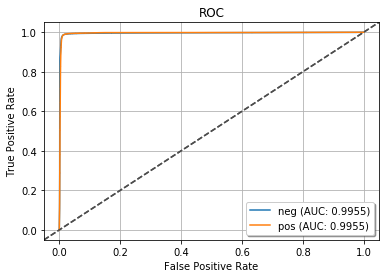


The AUC is
 0.9954673369721344 0.9955070304510198


In [30]:
print('For training set,')
print_result(evl_cps_train)

In [31]:
# train Logistic Model Trees for the APS data set without compensation for class imbalance
cls_cps.build_classifier(failure_train_cps_weka)


For test set,

The error rate is
 0.017187500000000022

The Confusion Matrix is
 [[15416.   209.]
 [   66.   309.]]

The ROC is



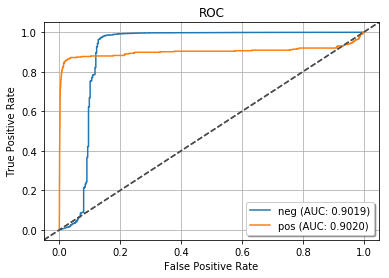


The AUC is
 0.901915136 0.9019861333333333


In [32]:
# error on test set

print('For test set,')
evl_cps_test = Evaluation(failure_train_weka)
evl_cps_test.test_model(cls_cps, failure_test_weka)
print_result(evl_cps_test)


In [40]:
jvm.stop()